# Image Smoothing

#### Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

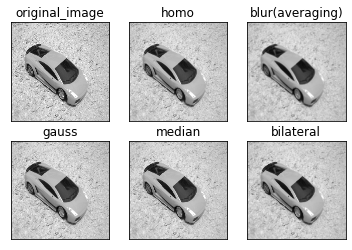

In [3]:
img = cv2.imread('D:\Computer-Vision-Bootcamp\images\lambo.png',0)

img = cv2.resize(img,(600,600))

#define a kernal for homogeneous function
#in this filter kernal is np.ones((a,a),np.float32)/a*a
kernel = np.ones((5,5),np.float32)/25

#FILTER NUMBER -----1 (homogeneous)
#this filter  work like, each output pixel is the mean of its kernal neigbours
#it is aka homogeneous filter in this all pixel contribute with equal weight.
#kernal is a small shape or matrix which we apply on image.

h_filter = cv2.filter2D(img,-1,kernel) # -1 is desired depth

#FILtER NUMBER 2----- (blur method or averaging)
#takes the avg of all the pixels under kernel area and
#replaces the central element with this average..
blur = cv2.blur(img,(8,8)) #here we have image and kernel as parameter


#Filter Number 3------(Gaussian Filter)
#Gaussian Filter -here it using different weight kernel,in  row as well as col.
#means side values are small then centre .It manage distance b/w value of pixel.
gau= cv2.GaussianBlur(img,(5,5),-8) #here 0 is sigma x value


#Filter Number 4-- (Median Filter)
#Median Filter --computes the median of all the pixels under the
#kernel window and the central pixel is replaced with this median value.
# This is highly effective in removing salt-and-pepper noise.
#here kernal size must be odd except one
med = cv2.medianBlur(img,5)


#Filter Number 4-- (bilateral filter)
#bilateral filter --- is highly effective at noise removal while preserving edges.
#It work like gaussian filter but more focus on edges
#it is slow as compare with other filters
#argument (img, neigbour_pixel_diameter,sigma_color,sigma_space)
bi_f = cv2.bilateralFilter(img,9,75,75)





# cv2.imshow("original==",img)
# cv2.imshow("homogeneous==",h_filter)
# cv2.imshow("blur==",blur)
# cv2.imshow("gau blur=",gau)
# cv2.imshow("median filter",med)
# cv2.imshow("bi_f",bi_f)

#Now plot all the images on graph
titles = ["original_image","homo","blur(averaging)","gauss","median","bilateral"]
images = [img,h_filter,blur,gau,med,bi_f]

#if you want then plot it
from matplotlib import pyplot as plt
for i in range(6):
    plt.subplot(2, 3, i+1),
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


cv2.waitKey(0)
cv2.destroyAllWindows()